In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import dtaidistance
from dtaidistance import dtw_ndim
from dtaidistance import dtw_visualisation
from dtaidistance import dtw_ndim_visualisation
import numpy as np
import matplotlib.pyplot as plt
import time
from random import randint
from tqdm import tqdm_notebook
%matplotlib inline

In [16]:
v1 = np.array([1, 0, 1], dtype=np.double)
v2 = np.array([0, 1, 0], dtype=np.double)

# ts1 = np.array([v1])
# ts2 = np.array([v2])

ts1 = np.array([v1, v2, v1, v2])
ts2 = np.array([v2, v1, v2, v1])

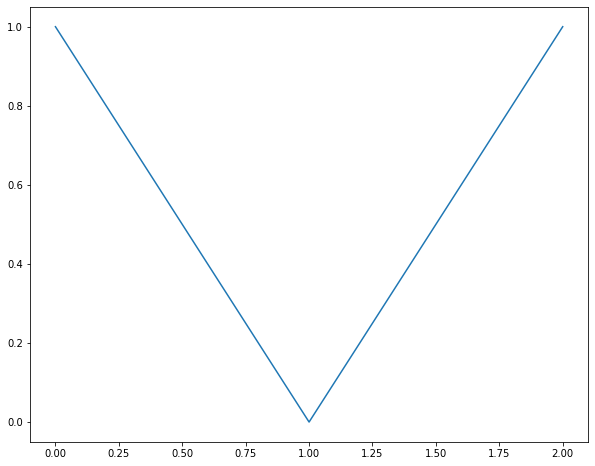

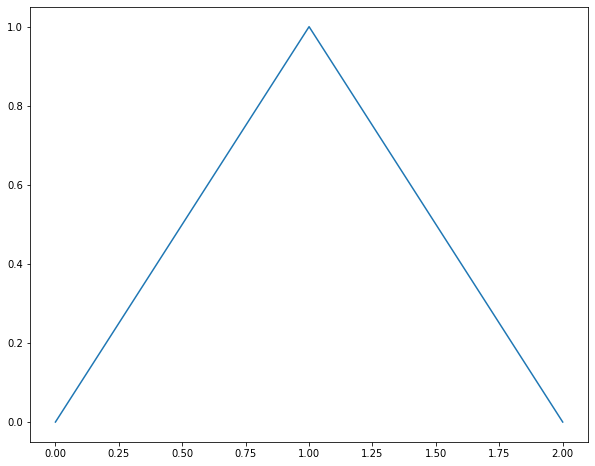

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(range(3), v1)
plt.show()
plt.figure(figsize=(10, 8))
plt.plot(range(3), v2)
plt.show()

In [18]:
def MDTW_L2_dist(v1, v2, window=None):
    return dtaidistance.dtw_ndim.distance(v1, v2, window=window)

def MDTW_L2_path(matr):
    return dtaidistance.dtw.best_path(matr)

def MDTW_L2_matr(v1, v2):
    return dtaidistance.dtw_ndim.warping_paths(v1, v2)

def MDTW_L2_visualisation(v1, v2, path):
    # another way to visualise
    # dtaidistance.dtw_ndim_visualisation.plot_warping(v1, v2, path)
    for i in range(v1.shape[1]):
        dtaidistance.dtw_visualisation.plot_warping(v1[:, i], v2[:, i], path)

In [12]:
n = 100
ts1 = np.array(np.sin(np.arange(n) * 2 * np.pi / n))
ts2 = np.array(np.cos(np.arange(n) * 2 * np.pi / n))

DTW_L2_dist

NameError: name 'DTW_L2_dist' is not defined

Проверим работоспособность функций.

In [66]:
ts1 = np.array([v1, v2, v1])
ts2 = np.array([v2, v1, v2])
ts3 = np.array([v2, v2, v1, v1, v1, v2])
ts4 = np.array([v2, v2, v2, v1, v1, v1])
ts5 = np.array([v1, v2, v2, v2, v1, v1])
ts6 = np.array([v1, v1, v2, v2, v2, v1])

In [65]:
print(MDTW_L2_dist(ts1, ts2) ** 2)
print(MDTW_L2_dist(ts3, ts1) ** 2)
print(MDTW_L2_dist(ts3, ts2) ** 2)
print(MDTW_L2_dist(ts4, ts1) ** 2)
print(MDTW_L2_dist(ts4, ts2) ** 2)
print(MDTW_L2_dist(ts4, ts3) ** 2)
print(MDTW_L2_dist(ts5, ts1) ** 2)
print(MDTW_L2_dist(ts5, ts2) ** 2)
print(MDTW_L2_dist(ts5, ts3) ** 2)
print(MDTW_L2_dist(ts5, ts4) ** 2)
print(MDTW_L2_dist(ts6, ts1) ** 2)
print(MDTW_L2_dist(ts6, ts2) ** 2)
print(MDTW_L2_dist(ts6, ts3) ** 2)
print(MDTW_L2_dist(ts6, ts4) ** 2)
print(MDTW_L2_dist(ts6, ts5) ** 2)

5.999999999999999
5.999999999999999
0.0
2.9999999999999996
2.9999999999999996
2.9999999999999996
0.0
5.999999999999999
5.999999999999999
2.9999999999999996
0.0
5.999999999999999
9.0
5.999999999999999
0.0


In [67]:
matr = MDTW_L2_matr(ts1, ts2)[1]
matr

array([[0.        ,        inf,        inf,        inf],
       [       inf, 1.73205081, 1.73205081, 2.44948974],
       [       inf, 1.73205081, 2.44948974, 1.73205081],
       [       inf, 2.44948974, 1.73205081, 2.44948974]])

In [68]:
path = MDTW_L2_path(matr)
path

[(0, 0), (0, 1), (1, 2), (2, 2)]

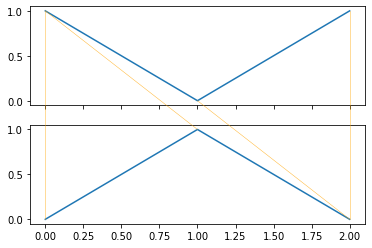

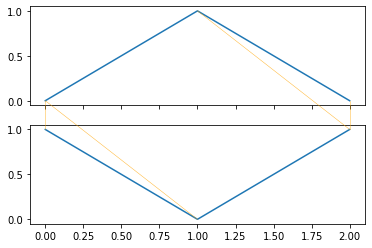

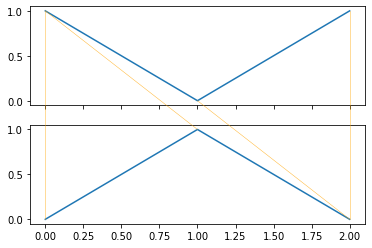

In [69]:
MDTW_L2_visualisation(ts1, ts2, path)

In [70]:
def MDTW_DTW_dist(v1, v2, metric=dtaidistance.dtw.distance, window=None):
    n = len(v1)
    m = len(v2)
    dp = np.zeros((n + 1, m + 1))
    dp[0][0] = 0
    for i in range(1, n + 1):
        dp[i][0] = np.inf
    for i in range(1, m + 1):
        dp[0][i] = np.inf
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if window is None or abs(i - j) < window:
                dp[i][j] = metric(v1[i - 1], v2[j - 1]) ** 2 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])
            elif abs(i - j) == window:
                if i - j == window:
                    dp[i][j] = metric(v1[i - 1], v2[j - 1]) ** 2 + min(dp[i - 1][j], dp[i - 1][j - 1])
                else:
                    dp[i][j] = metric(v1[i - 1], v2[j - 1]) ** 2 + min(dp[i][j - 1], dp[i - 1][j - 1])
            else:
                dp[i][j] = np.inf
    return dp[n][m] ** 0.5

In [71]:
def MDTW_DTW_matr(v1, v2, metric=dtaidistance.dtw.distance, window=None):
    n = len(v1)
    m = len(v2)
    dp = np.zeros((n + 1, m + 1))
    dp[0][0] = 0
    for i in range(1, n + 1):
        dp[i][0] = np.inf
    for i in range(1, m + 1):
        dp[0][i] = np.inf
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if window is None or abs(i - j) < window:
                dp[i][j] = metric(v1[i - 1], v2[j - 1]) ** 2 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])
            elif abs(i - j) == window:
                if i - j == window:
                    dp[i][j] = metric(v1[i - 1], v2[j - 1]) ** 2 + min(dp[i - 1][j], dp[i - 1][j - 1])
                else:
                    dp[i][j] = metric(v1[i - 1], v2[j - 1]) ** 2 + min(dp[i][j - 1], dp[i - 1][j - 1])
            else:
                dp[i][j] = np.inf
    return dp ** 0.5
    
    
def MDTW_DTW_path(v1, v2, matr):
    time_path = dtaidistance.dtw.best_path(matr)
    signal_path = []
    for el in time_path:
        matr = MDTW_L2_matr(v1[el[0]], v2[el[1]])[1]
        signal_path.append(dtaidistance.dtw.best_path(matr))
    return (time_path, signal_path)


def MDTW_DTW_visualisation(v1, v2, path):
    time_path, signal_path = path
    for i in range(len(time_path)):
        print('1 time series signal ' + str(time_path[i][0]) + '\n' +
                  '2 time series signal ' + str(time_path[i][1]))
        dtaidistance.dtw_visualisation.plot_warping(v1[time_path[i][0]], v2[time_path[i][1]], signal_path[i])
        plt.show()

In [76]:
MDTW_DTW_dist(ts1, ts2, dtaidistance.dtw.distance) ** 2

4.0

In [77]:
matr = MDTW_DTW_matr(ts1, ts2, dtaidistance.dtw.distance)
matr

array([[0.        ,        inf,        inf,        inf],
       [       inf, 1.41421356, 1.41421356, 2.        ],
       [       inf, 1.41421356, 2.        , 1.41421356],
       [       inf, 2.        , 1.41421356, 2.        ]])

In [78]:
path = MDTW_DTW_path(ts1, ts2, matr)
path

([(0, 0), (0, 1), (1, 2), (2, 2)],
 [[(0, 0), (0, 1), (1, 2), (2, 2)],
  [(0, 0), (1, 1), (2, 2)],
  [(0, 0), (1, 1), (2, 2)],
  [(0, 0), (0, 1), (1, 2), (2, 2)]])

1 time series signal 0
2 time series signal 0


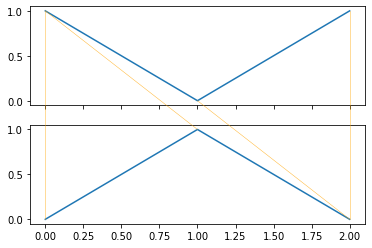

1 time series signal 0
2 time series signal 1


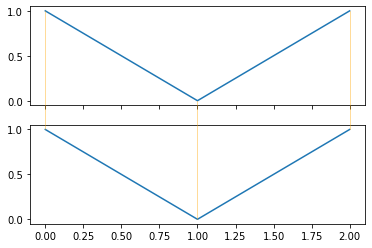

1 time series signal 1
2 time series signal 2


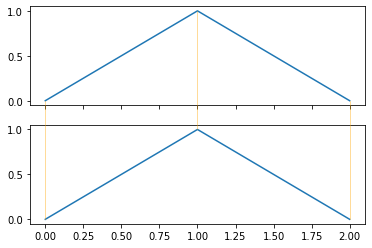

1 time series signal 2
2 time series signal 2


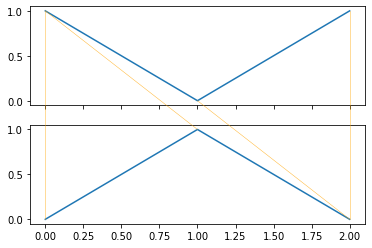

In [79]:
MDTW_DTW_visualisation(ts1, ts2, path)

In [37]:
v = np.array([0, 1, 2])
u = np.array(list(reversed(v)))
v, u

(array([0, 1, 2]), array([2, 1, 0]))

In [38]:
ts = []
for i in range(100):
    u = np.zeros(100)
    u[i] = 1
    ts.append(u)
ts = np.array(ts)

data = []
labels = []

for i in range(25):
    data.append([ts[i]] * 30)
    data.append([ts[-i - 1]] * 30)
    labels.append(0)
    labels.append(1)
    
data = np.array(data)
labels = np.array(labels)

In [26]:
ts1 = []
sz = 31

for i in range(sz):
    u = np.zeros(sz)
    u[i] = 1
    ts1.append(u)
    
ts2 = []

for i in range(sz):
    u = np.zeros(sz)
    u[sz - 1 - i] = 1
    ts2.append(u)
    
ts1 = np.array(ts1, dtype=float)
ts2 = np.array(ts2, dtype=float)

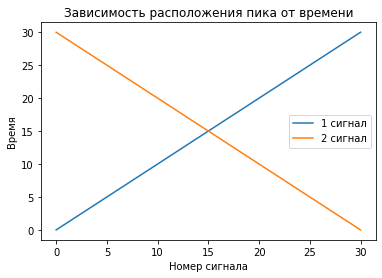

In [8]:
plt.plot(np.arange(31), np.arange(31), label='1 сигнал')
plt.plot(np.arange(31), np.arange(30, -1, -1), label='2 сигнал')
plt.title('Зависимость расположения пика от времени')
plt.xlabel('Номер сигнала')
plt.ylabel('Время')
plt.legend()

In [28]:
print(MDTW_DTW_dist(ts1, ts2, dtaidistance.dtw.distance) ** 2)
print(MDTW_L2_dist(ts1, ts2) ** 2)

4.0
60.00000000000001


In [30]:
ts1 = []
sz = 31

for i in range(sz):
    u = np.zeros(sz)
    u[i] = 1
    ts1.append(u)
    
ts2 = []

for i in range(sz):
    u = np.zeros(sz)
    u[(2 * i + 1) % sz] = 1
    
    ts2.append(u)
    
ts1 = np.array(ts1, dtype=float)
ts2 = np.array(ts2, dtype=float)

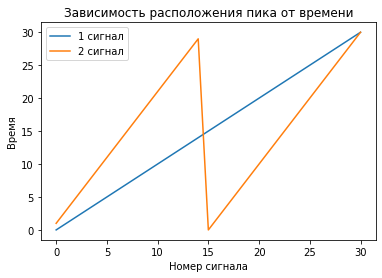

In [9]:
plt.plot(np.arange(31), np.arange(31), label='1 сигнал')
plt.plot(np.arange(31), (2 * np.arange(31) + 1) % 31, label='2 сигнал')
plt.title('Зависимость расположения пика от времени')
plt.xlabel('Номер сигнала')
plt.ylabel('Время')
plt.legend()

In [31]:
print(MDTW_DTW_dist(ts1, ts2, dtaidistance.dtw.distance) ** 2)
print(MDTW_L2_dist(ts1, ts2) ** 2)

2.0000000000000004
60.00000000000001


In [39]:
sz = 50
dim = 100
data = []
labels = []

for i in range(sz // 2):
    cur = []
    for j in range(i):
        cur.append(v1)
    cur.append(v2)
    cur.append(v2)
    cur.append(v2)
    for j in range(i + 3, dim):
        cur.append(v1)
    data.append(np.array(cur))
    rev_ts = np.array(list(reversed(cur)))
    rev_ts[-i - 1] = v1
    data.append(rev_ts)
    labels.append(0)
    labels.append(1)
    
data = np.array(data)
labels = np.array(labels)

In [40]:
matr = MDTW_L2_matr(data[0], data[3])
print(MDTW_L2_path(matr[1]))

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (97, 97), (98, 98), (99, 99)]


In [41]:
print(MDTW_L2_dist(data[2], data[3]))

0.0


In [42]:
def prepare_data(data):
    return data.reshape(data.shape[0], data.shape[1] * data.shape[2])

    
def prepared_L2(left, right):
    #print(left.shape, right.shape)
    return MDTW_L2_dist(left.reshape(dim, left.shape[0] // dim),
                        right.reshape(dim, right.shape[0] // dim), window=25)


def prepared_DTW(left, right):
    return MDTW_DTW_dist(left.reshape(dim, left.shape[0] // dim),
                        right.reshape(dim, right.shape[0] // dim), window=25)


In [43]:
class Experiment:
    def __init__(self, data, labels, eps=1e-9):
        self.data = data
        self.labels = labels
        self.eps = 1e-9
    
    def calc_dist_experiment(self, idx1, idx2):
        print(idx1, idx2, MDTW_L2_dist(self.data[idx1], self.data[idx2]) ** 2)
        print(idx1, idx2, MDTW_DTW_dist(self.data[idx1], self.data[idx2]) ** 2)
        
    def description_dist(self):
        equals = 0
        less = 0
        greater = 0
        max_diff = 0
        mean_diff = 0
        max_idx1 = 0
        max_idx2 = 0
        for idx1 in tqdm_notebook(range(len(self.data))):
            for idx2 in tqdm_notebook(range(len(self.data))):
                dst1 = MDTW_L2_dist(self.data[idx1], self.data[idx2])
                dst2 = MDTW_DTW_dist(self.data[idx1], self.data[idx2])
                if dst1 == dst2 or abs(dst1 - dst2) < self.eps:
                    equals += 1
                elif dst1 < dst2:
                    less += 1
                else:
                    greater += 1
                if dst1 - dst2 > max_diff:
                    max_diff = dst1 - dst2
                    max_idx1 = idx1
                    max_idx2 = idx2
                mean_diff += dst1 - dst2
        mean_diff /= len(data) * len(data)
        print('Calculate distance experiment results:')
        print('L2 = DTW', equals)
        print('L2 < DTW', less)
        print('L2 > DTW', greater)
        print('Maximum difference between L2 and DTW:', max_diff)
        print('Indexes of maximum difference:', max_idx1, max_idx2)
        print('Mean value of difference:', mean_diff)
        
    def time_experiment(self, iter_count=100, cnt_signals=None, info=True):
        if cnt_signals is None:
            cnt_signals = self.data.shape[1]
        L2_time = {'min': np.inf, 'max': 0, 'mean': 0}
        DTW_time = {'min': np.inf, 'max': 0, 'mean': 0}
        for i in range(iter_count):
            idx1 = randint(0, len(self.data) - 1)
            idx2 = randint(0, len(self.data) - 1)
            begin = time.time()
            MDTW_L2_dist(self.data[idx1][:cnt_signals], self.data[idx2][:cnt_signals])
            end = time.time()
            L2_time['min'] = min(L2_time['min'], end - begin)
            L2_time['max'] = max(L2_time['max'], end - begin)
            L2_time['mean'] += (end - begin) / iter_count
            
            begin = time.time()
            MDTW_DTW_dist(self.data[idx1][:cnt_signals], self.data[idx2][:cnt_signals])
            end = time.time()
            DTW_time['min'] = min(DTW_time['min'], end - begin)
            DTW_time['max'] = max(DTW_time['max'], end - begin)
            DTW_time['mean'] += (end - begin) / iter_count
            
        if info:
            print('L2 time result:')
            print('min:', L2_time['min'])
            print('max:', L2_time['max'])
            print('mean:', L2_time['mean'])
        
            print('DTW time result:')
            print('min:', DTW_time['min'])
            print('max:', DTW_time['max'])
            print('mean:', DTW_time['mean'])
        return (L2_time, DTW_time)
    
    #def _prepare_data(self, data):
    #    return data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    
    #def _prepared_L2(self, prepared_data):
    #    data = prepared_data.reshape(self.data.shape[0], self.data.shape[1], self.data.shape[2])
        
    
            
    def KNeighbourClassifier_test(self, window=None):
        data = prepare_data(self.data)
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(data, self.labels,
                                                                                   test_size=0.3)
        print(data, self.labels)
        print(self.X_train, self.X_test, self.y_train, self.y_test)
        
        model_L2 = KNeighborsClassifier(n_neighbors=1, metric=prepared_L2)
        model_L2.fit(self.X_train, self.y_train)
        predicted_L2 = model_L2.predict(self.X_test)
        accuracy_L2 = accuracy_score(self.y_test, predicted_L2)
            
        model_DTW = KNeighborsClassifier(n_neighbors=1, metric=prepared_DTW)
        model_DTW.fit(self.X_train, self.y_train)
        predicted_DTW = model_DTW.predict(self.X_test)
        accuracy_DTW = accuracy_score(self.y_test, predicted_DTW)
        
        print(predicted_L2)
        print(predicted_DTW)
        
            
        return (accuracy_L2, accuracy_DTW)

In [48]:
# print(len(data[:10]))

exp = Experiment(data[:20], labels[:20])
results = []
for i in tqdm_notebook(range(1, 51)):
    results.append(exp.time_experiment(cnt_signals=i, info=False))

/home/kulpet345/anaconda3/envs/mipt-stats/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [80]:
print(results)

[({'min': 2.2649765014648438e-05, 'max': 0.00025081634521484375, 'mean': 4.887819290161131e-05}, {'min': 4.7206878662109375e-05, 'max': 0.0001773834228515625, 'mean': 7.72571563720703e-05}), ({'min': 5.555152893066406e-05, 'max': 0.0005097389221191406, 'mean': 9.644508361816407e-05}, {'min': 0.00016689300537109375, 'max': 0.0009894371032714844, 'mean': 0.0002548193931579589}), ({'min': 0.00010538101196289062, 'max': 0.0008671283721923828, 'mean': 0.0002586150169372558}, {'min': 0.0003650188446044922, 'max': 0.0024700164794921875, 'mean': 0.000800285339355469}), ({'min': 0.0001709461212158203, 'max': 0.0007798671722412109, 'mean': 0.0002451825141906738}, {'min': 0.0006325244903564453, 'max': 0.0027379989624023438, 'mean': 0.0008580899238586426}), ({'min': 0.0002522468566894531, 'max': 0.0009684562683105469, 'mean': 0.0002961325645446778}, {'min': 0.0009777545928955078, 'max': 0.0026013851165771484, 'mean': 0.0011296057701110842}), ({'min': 0.0003521442413330078, 'max': 0.000962495803833

In [234]:
means_L2 = [results[num][0]['mean'] for num in range(50)]
means_DTW = [results[num][1]['mean'] for num in range(50)]

max_L2 = [results[num][0]['max'] for num in range(50)]
max_DTW = [results[num][1]['max'] for num in range(50)]

min_L2 = [results[num][0]['min'] for num in range(50)]
min_DTW = [results[num][1]['min'] for num in range(50)]

In [288]:
def plot_time_graph(L2, DTW, title='среднего'):
    plt.figure(figsize=(15, 6))
    plt.title('Зависимость {} времени работы MDTW с использованием L2 и DTW метрики между сигналами от количества\
 сигналов'.format(title))
    plt.xlabel('Количество сигналов')
    plt.ylabel('Время / секунды')
    plt.plot(range(1, 51), L2, label='L2')
    plt.plot(range(1, 51), DTW, label='DTW')
    plt.legend()

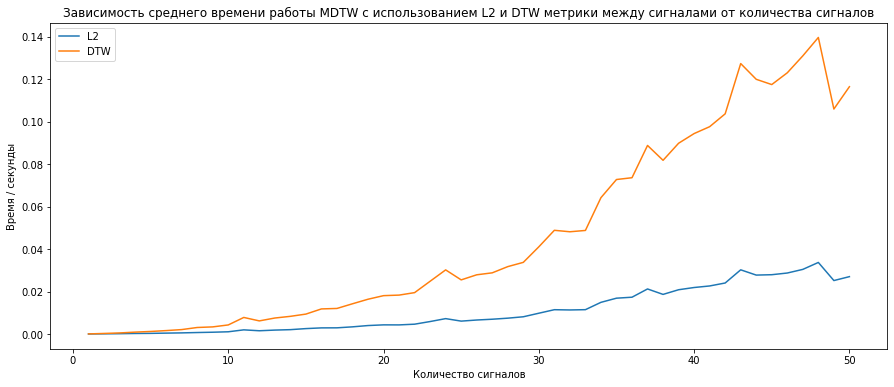

In [289]:
plot_time_graph(means_L2, means_DTW, title='среднего')

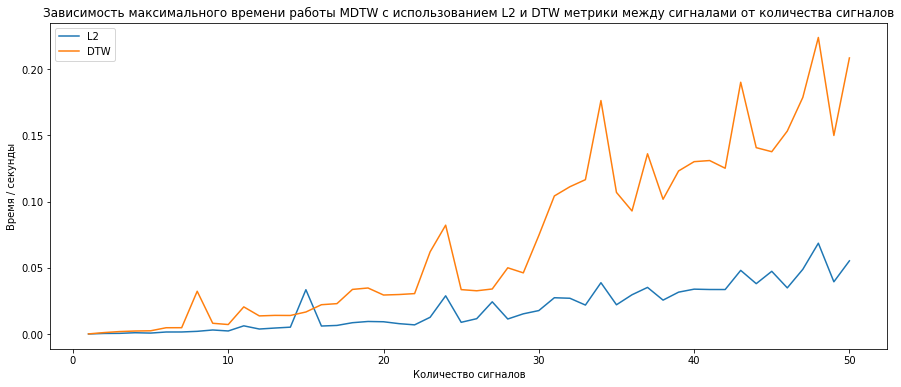

In [290]:
plot_time_graph(max_L2, max_DTW, title='максимального')

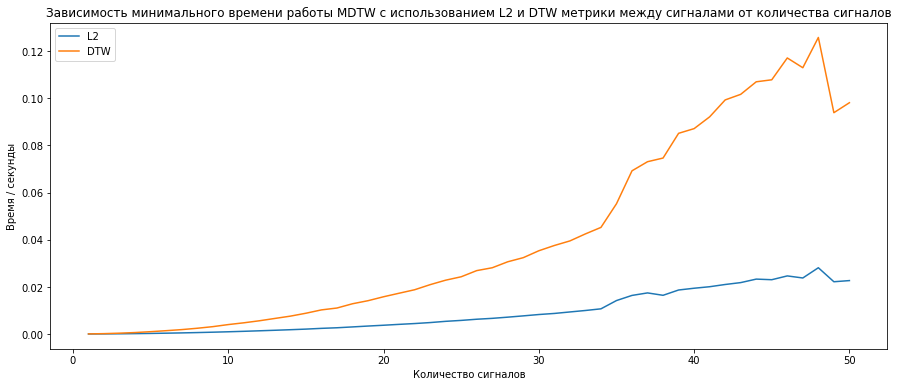

In [291]:
plot_time_graph(min_L2, min_DTW, title='минимального')

In [47]:
#for i in range(20):
#    for j in range(20):
#        if MDTW_L2_dist(data[i], data[j]) < 1e-8:
#            print("!!!!!", i, j)
#        print(MDTW_L2_dist(data[i], data[j]), end=' ')
#    print()
    
#for i in range(20):
#    for j in range(20):
#        print(MDTW_L2_dist(data[i], data[j]), end=' ')
#    print()

exp = Experiment(data[:40], labels[:40])
L2_accuracy, DTW_accuracy = exp.KNeighbourClassifier_test()

[[0. 1. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 ...
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]] [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1]
[[1. 0. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 ...
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]] [[1. 0. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 ...
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]] [0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0] [1 1 0 0 1 1 1 0 0 1 1 0]
[1 1 0 0 1 1 1 0 0 1 1 0]
[1 1 0 0 1 1 1 0 0 1 1 0]


In [157]:
print(data[2], data[3])

[[1. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1.

In [46]:
print(L2_accuracy, DTW_accuracy)

1.0 1.0


In [119]:
a = np.array([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]])
print(a.shape)

(2, 3, 4)


In [120]:
a.reshape((2, 12))

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])

In [121]:
a.reshape((2, 3, 4))

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])